In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
import operator
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\Datasets\FuelConsumptionCo2.csv', encoding = 'unicode_escape')   
df.head(100)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,BMW,435i COUPE,COMPACT,3.0,6,M6,Z,11.8,7.9,10.0,28,230
96,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,A8,Z,11.7,7.8,9.9,29,228
97,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
98,2014,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202


In [5]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
df.ENGINESIZE.describe()

count    1067.000000
mean        3.346298
std         1.415895
min         1.000000
25%         2.000000
50%         3.400000
75%         4.300000
max         8.400000
Name: ENGINESIZE, dtype: float64

In [11]:
df.CO2EMISSIONS.describe()

count    1067.000000
mean      256.228679
std        63.372304
min       108.000000
25%       207.000000
50%       251.000000
75%       294.000000
max       488.000000
Name: CO2EMISSIONS, dtype: float64

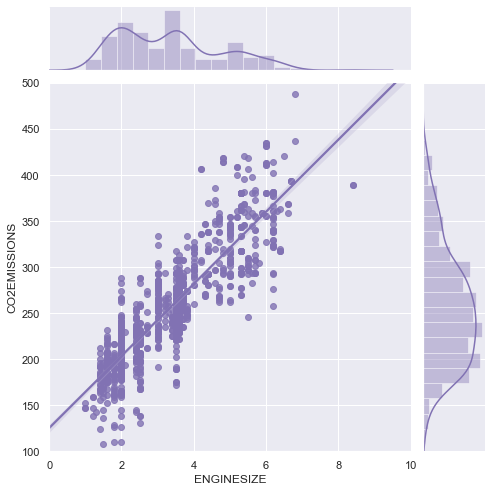

In [14]:
sns.set(style="darkgrid")

g = sns.jointplot("ENGINESIZE", "CO2EMISSIONS", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 10), ylim=(100, 500),
                  color="m", height=7)

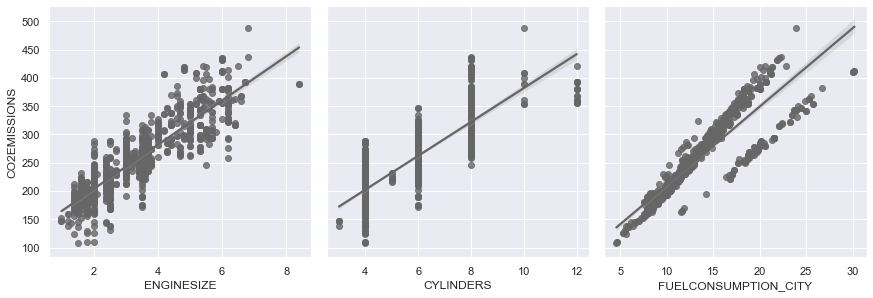

In [21]:
g = sns.PairGrid(df, y_vars=["CO2EMISSIONS"], x_vars=["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"], height=4)
g.map(sns.regplot, color=".4")

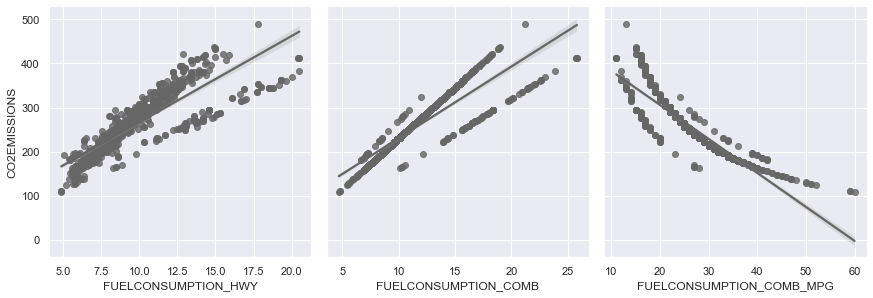

In [22]:
g = sns.PairGrid(df, y_vars=["CO2EMISSIONS"], x_vars=["FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"], height=4)
g.map(sns.regplot, color=".4")


In [24]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = df[['CO2EMISSIONS']]

# Linear Models

### 1.Linear Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)
lr_pred = lin_df.predict(X_test)   
lr_pred[0:5]

array([[308.96275897],
       [241.38417423],
       [279.01768813],
       [237.30710931],
       [206.05910132]])

In [30]:
linrgr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
linrgr_r2 = r2_score(y_test, lr_pred)
print("RMSE Score for Test set: ",linrgr_rmse)
print("R2 Score: ",linrgr_r2)

RMSE Score for Test set:  19.75373077859394
R2 Score:  0.9032576748788012


### Ridge Regression

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_train, y_train)
rdg_pred = reg.predict(X_test)
print("The coefficients after ridge regression is :", reg.coef_)
print("The intercept after ridge regression is :", reg.intercept_)
rdg_pred[0:5]

The coefficients after ridge regression is : [[ 9.34792972  6.71627577 -5.12708293  0.89961187  7.96102794 -3.90839506]]
The intercept after ridge regression is : [257.04054999]


array([[308.11418474],
       [242.03938319],
       [278.3944232 ],
       [236.58282648],
       [205.64339057]])

In [42]:
rdgrgr_rmse = np.sqrt(mean_squared_error(y_test, rdg_pred))
rdgrgr_r2 = r2_score(y_test, rdg_pred)
print("RMSE Score for Test set: ",rdgrgr_rmse)
print("R2 Score: ",rdgrgr_r2)

RMSE Score for Test set:  19.743241893266763
R2 Score:  0.9033603845660795


### Lasso

In [43]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoCV
regr = LassoCV()
regr.fit(X, y)
print(regr.alpha_)

0.6075327574825272


In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=regr.alpha_)
clf.fit(X_train, y_train)
las_pred = clf.predict(X_test)
print("The coefficients after lasso regression is :", clf.coef_)
print("The intercept after lasso regression is :", clf.intercept_)
las_pred[0:5]

The coefficients after lasso regression is : [ 8.39361003  6.69635277  0.          3.62303732  0.         -3.95282406]
The intercept after lasso regression is : [259.73217631]


array([307.42324848, 242.19111393, 279.03322918, 236.90739772,
       206.49082656])

In [45]:
lasrgr_rmse = np.sqrt(mean_squared_error(y_test, las_pred))
lasrgr_r2 = r2_score(y_test, las_pred)
print("RMSE Score for Test set: ",lasrgr_rmse)
print("R2 Score: ",lasrgr_r2)

RMSE Score for Test set:  19.780075069733265
R2 Score:  0.9029994646738483


### ElasticNet

In [46]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV()
regr.fit(X, y)
print(regr.alpha_)

0.8572047002650004


In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
# Actual regression on test set
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=regr.alpha_)
reg.fit(X_train, y_train)
en_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
en_pred[0:5]

The coefficients after elasticnet regression is : [ 5.37863256  6.21499572  1.1017821   1.63087673  1.39080286 -3.98032444]
The intercept after elasticnet regression is : [261.41004635]


array([305.10993218, 240.2923344 , 281.08082635, 237.22393332,
       209.30239949])

In [48]:
enrgr_rmse = np.sqrt(mean_squared_error(y_test, en_pred))
enrgr_r2 = r2_score(y_test, en_pred)
print("RMSE Score for Test set: ",enrgr_rmse)
print("R2 Score: ",enrgr_r2)

RMSE Score for Test set:  20.23097046282535
R2 Score:  0.8985267215348357


### LassoLars

In [49]:
# Finding the best value of alpha using cross validation
from sklearn.linear_model import LassoLarsCV
regr = LassoLarsCV()
regr.fit(X, y)
print(regr.alpha_)

0.005810529926268061


In [50]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=regr.alpha_)
reg.fit(X_train, y_train)
lslr_pred = reg.predict(X_test)
print("The coefficients after elasticnet regression is :", reg.coef_)
print("The intercept after elasticnet regression is :", reg.intercept_)
lslr_pred[0:5]

The coefficients after elasticnet regression is : [ 9.31917034  6.45687905  0.          3.76872847  0.         -3.79338929]
The intercept after elasticnet regression is : [252.43479448]


array([307.42352838, 242.42721182, 278.58092938, 236.63700811,
       206.06355539])

In [52]:
lslrrgr_rmse = np.sqrt(mean_squared_error(y_test, lslr_pred))
lslrrgr_r2 = r2_score(y_test, lslr_pred)
print("RMSE Score for Test set: ",lslrrgr_rmse)
print("R2 Score: ",lslrrgr_r2)

RMSE Score for Test set:  19.760483502050473
R2 Score:  0.9031915217217275


# 3.Polynomial Regression

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

plrgr_rmse = np.zeros(9)
plrgr_r2 = np.zeros(9)

for i in range(1,10):
    poly_df = PolynomialFeatures(degree = i)
    transform_poly = poly_df.fit_transform(X_train)
    clf = linear_model.LinearRegression()
    clf.fit(transform_poly,y_train)
    polynomial_predict = clf.predict(poly_df.fit_transform(X_test))
    plrgr_rmse[i-1] = np.sqrt(mean_squared_error(y_test,polynomial_predict))
    plrgr_r2[i-1] = r2_score(y_test,polynomial_predict)
    print("\nThe predicted values with degree = ",i," is \n",polynomial_predict[0:5])
    print("\nRMSE Score of Test set for degree ", i," is: ",plrgr_rmse[i-1])
    print("R2 RMSE Score of Test set for degree ", i," is: ",plrgr_r2[i-1]) 

print("\nThe best RMSE score of Test Set is ", plrgr_rmse.min(), " with degree = ",plrgr_rmse.argmin()+1)
print("The max R2 score of Test Set is ", plrgr_r2.max(), " with degree = ",plrgr_r2.argmax()+1)


The predicted values with degree =  1  is 
 [[308.96275897]
 [241.38417423]
 [279.01768813]
 [237.30710931]
 [206.05910132]]

RMSE Score of Test set for degree  1  is:  19.753730778593926
R2 RMSE Score of Test set for degree  1  is:  0.9032576748788013

The predicted values with degree =  2  is 
 [[265.28125   ]
 [280.75585938]
 [181.68359375]
 [223.25976562]
 [217.58007812]]

RMSE Score of Test set for degree  2  is:  66.68979823749869
R2 RMSE Score of Test set for degree  2  is:  -0.10264843920559641

The predicted values with degree =  3  is 
 [[314.4141922 ]
 [225.49828339]
 [277.00170898]
 [249.75688171]
 [204.79666138]]

RMSE Score of Test set for degree  3  is:  19.028426569070792
R2 RMSE Score of Test set for degree  3  is:  0.9102314898757643

The predicted values with degree =  4  is 
 [[315.64861691]
 [220.25516045]
 [272.21159756]
 [229.34732735]
 [209.67060101]]

RMSE Score of Test set for degree  4  is:  58.49077940180968
R2 RMSE Score of Test set for degree  4  is:  0.1

# 4.Decision Tree Regression

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'friedman_mse', 'mae']
dt_rmse = np.zeros(3)
dt_r2 = np.zeros(3)
n = 0

from sklearn.tree import DecisionTreeRegressor
for i in k:
    dt_reg = DecisionTreeRegressor(criterion = i)          # create  DecisionTreeReg with sklearn
    dt_reg.fit(X_train,y_train)
    dt_predict = dt_reg.predict(X_test)
    dt_rmse[n] = np.sqrt(mean_squared_error(y_test,dt_predict))
    dt_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",dt_predict[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",dt_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",dt_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", dt_rmse.min())
print("The max R2 score of Test Set is ", dt_r2.max())   


The predicted values for Test Set using criterion =  mse  is:  [304. 221. 294. 221. 207.]

The RMSE score for Test Set using criterion =  mse  is:  13.758656295327663
The R2 score for Test Set using criterion =  mse  is:  0.9530678658460063

The predicted values for Test Set using criterion =  friedman_mse  is:  [304. 221. 294. 221. 207.]

The RMSE score for Test Set using criterion =  friedman_mse  is:  13.207132501404585
The R2 score for Test Set using criterion =  friedman_mse  is:  0.9567550569075653

The predicted values for Test Set using criterion =  mae  is:  [304. 221. 294. 221. 207.]

The RMSE score for Test Set using criterion =  mae  is:  15.063830957471104
The R2 score for Test Set using criterion =  mae  is:  0.9437413732477961

The best RMSE score for Test Set is  13.207132501404585
The max R2 score of Test Set is  0.9567550569075653


# Ensemble Methods

### Random Forest Model

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['mse', 'mae']
n = 0
rf_rmse = np.zeros(2)
rf_r2 = np.zeros(2)

from sklearn.ensemble import RandomForestRegressor
for i in k:
    rf_reg = RandomForestRegressor(criterion = i)
    rf_reg.fit(X_train,y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_rmse[n] = np.sqrt(mean_squared_error(y_test,rf_pred))
    rf_r2[n] = r2_score(y_test,dt_predict)
    print("\nThe predicted values for Test Set using criterion = ",i," is: ",rf_pred[0:5])
    print("\nThe RMSE score for Test Set using criterion = ",i," is: ",rf_rmse[n])
    print("The R2 score for Test Set using criterion = ",i," is: ",rf_r2[n])
    n += 1   
    
print("\nThe best RMSE score for Test Set is ", rf_rmse.min())
print("The max R2 score of Test Set is ", rf_r2.max())       


The predicted values for Test Set using criterion =  mse  is:  [304.13 221.   293.68 220.86 207.02]

The RMSE score for Test Set using criterion =  mse  is:  10.890467043485033
The R2 score for Test Set using criterion =  mse  is:  0.9437413732477961

The predicted values for Test Set using criterion =  mae  is:  [303.56 220.97 293.94 220.97 207.  ]

The RMSE score for Test Set using criterion =  mae  is:  11.825136978651155
The R2 score for Test Set using criterion =  mae  is:  0.9437413732477961

The best RMSE score for Test Set is  10.890467043485033
The max R2 score of Test Set is  0.9437413732477961


### ADABoost

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['linear', 'square', 'exponential']
n = 0
adb_rmse = np.zeros(3)
adb_r2 = np.zeros(3)

from sklearn.ensemble import AdaBoostRegressor
for i in k:
    ada_regr = AdaBoostRegressor(loss = i)
    ada_regr.fit(X_train,y_train)
    ada_pred = ada_regr.predict(X_test)
    adb_rmse[n] = np.sqrt(mean_squared_error(y_test,ada_pred))
    adb_r2[n] = r2_score(y_test,ada_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",ada_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",adb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",adb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", adb_rmse.min())
print("The max R2 score of Test Set is ", adb_r2.max())           


The predicted values for Test Set using loss =  linear  is:  [304.45762712 208.86956522 280.01204819 208.86956522 204.53846154]

The RMSE score for Test Set using loss =  linear  is:  19.501657787437598
The R2 score for Test Set using loss =  linear  is:  0.905710936447163

The predicted values for Test Set using loss =  square  is:  [292.46052632 209.90229885 274.63888889 209.90229885 193.24      ]

The RMSE score for Test Set using loss =  square  is:  20.520373611482412
The R2 score for Test Set using loss =  square  is:  0.8956028152468039

The predicted values for Test Set using loss =  exponential  is:  [299.72839506 207.09090909 279.77777778 207.09090909 200.3452381 ]

The RMSE score for Test Set using loss =  exponential  is:  20.453975426382932
The R2 score for Test Set using loss =  exponential  is:  0.8962773223559259

The best RMSE score for Test Set is  19.501657787437598
The max R2 score of Test Set is  0.905710936447163


### Gradient Boosting

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

k = ['ls', 'lad', 'huber', 'quantile']
n = 0
gdb_rmse = np.zeros(4)
gdb_r2 = np.zeros(4)

from sklearn.ensemble import GradientBoostingRegressor

for i in k:
    reg = GradientBoostingRegressor(loss = i)
    reg.fit(X_train, y_train)
    grdbst_pred = reg.predict(X_test)
    gdb_rmse[n] = np.sqrt(mean_squared_error(y_test,grdbst_pred))
    gdb_r2[n] = r2_score(y_test,grdbst_pred)
    print("\nThe predicted values for Test Set using loss = ",i," is: ",grdbst_pred[0:5])
    print("\nThe RMSE score for Test Set using loss = ",i," is: ",gdb_rmse[n])
    print("The R2 score for Test Set using loss = ",i," is: ",gdb_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", gdb_rmse.min())
print("The max R2 score of Test Set is ", gdb_r2.max())    


The predicted values for Test Set using loss =  ls  is:  [307.41137463 224.30363662 282.64214429 225.6553822  206.52535218]

The RMSE score for Test Set using loss =  ls  is:  12.355442219923363
The R2 score for Test Set using loss =  ls  is:  0.9621527047488243

The predicted values for Test Set using loss =  lad  is:  [306.40889779 225.06308895 276.48241521 228.03224139 206.70181601]

The RMSE score for Test Set using loss =  lad  is:  15.75334192622392
The R2 score for Test Set using loss =  lad  is:  0.9384732947922321

The predicted values for Test Set using loss =  huber  is:  [305.65361155 222.77790446 290.12157734 224.91441658 205.3421301 ]

The RMSE score for Test Set using loss =  huber  is:  12.60819687951863
The R2 score for Test Set using loss =  huber  is:  0.960588385727836

The predicted values for Test Set using loss =  quantile  is:  [317.72980573 228.23082998 292.45479695 239.16817418 206.86392312]

The RMSE score for Test Set using loss =  quantile  is:  29.5006232

# KNearestNeighbor

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsRegressor

n = 0
knn_rmse = np.zeros(9)
knn_r2 = np.zeros(9)

for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    knn_pred = neigh.predict(X_test)
    knn_rmse[n] = np.sqrt(mean_squared_error(y_test,knn_pred))
    knn_r2[n] = r2_score(y_test,knn_pred)
    print("\nThe predicted values for Test Set with neighbor k = ",i," is: \n",knn_pred[0:5])
    print("\nThe RMSE score for Test Set with neighbor k = ",i," is: ",knn_rmse[n])
    print("The R2 score for Test Set with neighbor k = ",i," is: ",knn_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", knn_rmse.min(), " with neighbor k = ", knn_rmse.argmin()+1)
print("The max R2 score of Test Set is ", knn_r2.max(), " with neighbor k = ", knn_r2.argmax()+1)   


The predicted values for Test Set with neighbor k =  1  is: 
 [[306.]
 [221.]
 [290.]
 [221.]
 [207.]]

The RMSE score for Test Set with neighbor k =  1  is:  14.762924006904758
The R2 score for Test Set with neighbor k =  1  is:  0.9459665088674759

The predicted values for Test Set with neighbor k =  2  is: 
 [[305.]
 [221.]
 [290.]
 [221.]
 [207.]]

The RMSE score for Test Set with neighbor k =  2  is:  10.677151194602367
The R2 score for Test Set with neighbor k =  2  is:  0.9717362980095889

The predicted values for Test Set with neighbor k =  3  is: 
 [[305.33333333]
 [221.        ]
 [291.33333333]
 [221.66666667]
 [207.66666667]]

The RMSE score for Test Set with neighbor k =  3  is:  11.048792005316209
The R2 score for Test Set with neighbor k =  3  is:  0.9697344997901257

The predicted values for Test Set with neighbor k =  4  is: 
 [[305.5 ]
 [222.  ]
 [292.75]
 [222.  ]
 [208.  ]]

The RMSE score for Test Set with neighbor k =  4  is:  12.50571520436099
The R2 score for Te

# Stochastic Gradient Descent

In [65]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)
sgd_pred = reg.predict(X_test)
sgd_pred[0:5]

array([306.8909593 , 242.59082287, 278.86960518, 237.3718541 ,
       206.85175043])

In [66]:
sgd_rmse = np.sqrt(mean_squared_error(y_test,sgd_pred))
sgd_r2 = r2_score(y_test,sgd_pred)
print("RMSE Score for Test set: ",sgd_rmse)
print("R2 Score for Test set: ",sgd_r2)

RMSE Score for Test set:  19.80855110342886
R2 Score for Test set:  0.9027199734411867


# Support Vector Machines

### SVR

In [67]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import SVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
svr_rmse = np.zeros(4)
svr_r2 = np.zeros(4)

for i in k:
    reg = SVR(kernel = i)
    reg.fit(X_train, y_train)
    svr_pred = reg.predict(X_test)
    svr_rmse[n] = np.sqrt(mean_squared_error(y_test,svr_pred))
    svr_r2[n] = r2_score(y_test,svr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",svr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",svr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",svr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", svr_rmse.min())
print("The max R2 score of Test Set is ", svr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [303.6357347  226.68922424 289.59212546 224.64725402 206.76272119]

The RMSE score for Test Set with kernel =  linear  is:  30.394270768636897
The R2 score for Test Set with kernel =  linear  is:  0.7709650727520849

The predicted values for Test Set with kernel =  poly  is:  [264.91553877 246.72764209 246.63329201 246.27513821 225.05209911]

The RMSE score for Test Set with kernel =  poly  is:  40.48669307894525
The R2 score for Test Set with kernel =  poly  is:  0.5936101328282476

The predicted values for Test Set with kernel =  rbf  is:  [304.34212024 224.79388755 288.58780203 222.21044118 206.55371891]

The RMSE score for Test Set with kernel =  rbf  is:  30.44709437722849
The R2 score for Test Set with kernel =  rbf  is:  0.7701682801807522

The predicted values for Test Set with kernel =  sigmoid  is:  [321.41384202 210.60199933 308.89780908 205.28264278 200.07801882]

The RMSE score for Test Set with kernel =  sigmo

### NuSVR

In [68]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import NuSVR
k = ['linear', 'poly', 'rbf', 'sigmoid']
n = 0
nusvr_rmse = np.zeros(4)
nusvr_r2 = np.zeros(4)

for i in k:
    reg = NuSVR(kernel = i)
    reg.fit(X_train, y_train)
    nusvr_pred = reg.predict(X_test)
    nusvr_rmse[n] = np.sqrt(mean_squared_error(y_test,nusvr_pred))
    nusvr_r2[n] = r2_score(y_test,nusvr_pred)
    print("\nThe predicted values for Test Set with kernel = ",i," is: ",nusvr_pred[0:5])
    print("\nThe RMSE score for Test Set with kernel = ",i," is: ",nusvr_rmse[n])
    print("The R2 score for Test Set with kernel = ",i," is: ",nusvr_r2[n])
    n += 1   
print("\nThe best RMSE score for Test Set is ", nusvr_rmse.min())
print("The max R2 score of Test Set is ", nusvr_r2.max())         


The predicted values for Test Set with kernel =  linear  is:  [304.31845984 232.92154591 285.18795245 229.68484147 207.67249774]

The RMSE score for Test Set with kernel =  linear  is:  24.33386832846783
The R2 score for Test Set with kernel =  linear  is:  0.8531950946003223

The predicted values for Test Set with kernel =  poly  is:  [265.61202286 252.419126   252.39223555 251.98985224 235.33795856]

The RMSE score for Test Set with kernel =  poly  is:  35.99485330953234
The R2 score for Test Set with kernel =  poly  is:  0.6787825899671546

The predicted values for Test Set with kernel =  rbf  is:  [305.09993916 229.3471858  286.58837252 225.71809016 206.36200491]

The RMSE score for Test Set with kernel =  rbf  is:  30.706091809256826
The R2 score for Test Set with kernel =  rbf  is:  0.7662415342030559

The predicted values for Test Set with kernel =  sigmoid  is:  [320.27648342 215.65452335 307.00274267 210.50297892 202.05700189]

The RMSE score for Test Set with kernel =  sigmo

### LinearSVR

In [69]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

from sklearn.svm import LinearSVR

reg = LinearSVR()
reg.fit(X_train, y_train)
linsvr_pred = reg.predict(X_test)
linsvr_rmse = np.sqrt(mean_squared_error(y_test,linsvr_pred))
linsvr_r2 = r2_score(y_test,linsvr_pred)
print("\nThe predicted values for Test Set is: ",linsvr_pred[0:5])
print("\nThe RMSE score for Test Set is: ",linsvr_rmse)
print("The R2 score for Test Set is: ",linsvr_r2)  


The predicted values for Test Set is:  [295.6263318  234.2864577  274.87630986 232.05657528 206.8974851 ]

The RMSE score for Test Set is:  21.705536155888908
The R2 score for Test Set is:  0.8831955749626657


# Report on accuracy of different algorithms using RMSE value and R2 score

In [70]:
# rmse = root mean squared score.......r2 = R2-Score
# 1.Linear Models
# 1.1. Linear Regression
linrgr_rmse
linrgr_r2

# 1.2. Ridge Regression
rdgrgr_rmse
rdgrgr_r2

# 1.3. Lasso
lasrgr_rmse
lasrgr_r2

# 1.4. ElasticNet
enrgr_rmse
enrgr_r2

# 1.5. LarsLasso
lslrrgr_rmse
lslrrgr_r2

# 2.Polynomial Regression
plrgr_rmse = plrgr_rmse.min()
plrgr_r2 = plrgr_r2.max()

# 3.Decision Tree
dt_rmse = dt_rmse.min()
dt_r2 = dt_r2.max()

# 4.Ensemble Methods
# 4.1. Random Forest
rf_rmse = rf_rmse.min()
rf_r2 = rf_r2.max()

# 4.2. AdaBoost
adb_rmse = adb_rmse.min()
adb_r2 = adb_r2.max()

# 4.3. GradientBoost
gdb_rmse = gdb_rmse.min()
gdb_r2 = gdb_r2.max()

# 5.KNearestNeighbor
knn_rmse = knn_rmse.min()
knn_r2 = knn_r2.max()

# 6.Stochastic Gradient Descent
sgd_rmse
sgd_r2

# 7.Support Vector Machines
# 7.1. SVR
svr_rmse = svr_rmse.min()
svr_r2 = svr_r2.max()

# 7.2. NuSVR
nusvr_rmse = nusvr_rmse.min()
nusvr_r2 = nusvr_r2.max()
# 7.3. LinearSVR
linsvr_rmse = linsvr_rmse
linsvr_r2 = linsvr_r2

#max of all
min_rmse = [linrgr_rmse,rdgrgr_rmse,lasrgr_rmse,enrgr_rmse,lslrrgr_rmse,plrgr_rmse,dt_rmse,rf_rmse,adb_rmse,gdb_rmse,knn_rmse,sgd_rmse,svr_rmse,nusvr_rmse,linsvr_rmse]
max_r2 = [linrgr_r2,rdgrgr_r2,lasrgr_r2,enrgr_r2,lslrrgr_r2,plrgr_r2,dt_r2,rf_r2,adb_r2,gdb_r2,knn_r2,sgd_r2,svr_r2,nusvr_r2,linsvr_r2]

## Final Report

In [71]:
data = {'Algorithm':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'LarsLasso Regression', 'Polynomial Regression','Decision Tree Regression','Random Forest Regression','AdaBoost Regression','Gradient Boosting Regression','KNearest Neighbor Regression','Stochastic Gradient Regression','Support Vector Regression','Nu Support Vector Regression','Linear Support Vector Regression'], 
        'R2-Sore':max_r2, 'Root Mean Squared Error':min_rmse}
s = pd.DataFrame(data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
s

,Algorithm,R2-Sore,Root Mean Squared Error
1,Linear Regression,0.903258,19.753731
2,Ridge Regression,0.903360,19.743242
3,Lasso Regression,0.902999,19.780075
4,ElasticNet Regression,0.898527,20.230970
5,LarsLasso Regression,0.903192,19.760484
6,Polynomial Regression,0.910231,19.028427
7,Decision Tree Regression,0.956755,13.207133
8,Random Forest Regression,0.943741,10.890467
9,AdaBoost Regression,0.905711,19.501658
10,Gradient Boosting Regression,0.962153,12.355442
